## 1. Tensors

In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0724, 0.5493],
        [0.5138, 0.5159]]) 



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n{rand_tensor}\n")
print(f"Ones Tensor: \n{ones_tensor}\n")
print(f"Zeros Tensor: \n{zeros_tensor}\n")

Random Tensor: 
tensor([[0.6149, 0.3780, 0.9693],
        [0.3616, 0.1389, 0.0733]])

Ones Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros Tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])



In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(f"Device tensor is stored on: {tensor.device}")

In [8]:
tensor  = torch.ones(4,4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)
print(t1)
print(t1.shape)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
torch.Size([4, 12])


In [11]:
t1 = torch.stack([tensor,tensor,tensor],dim=1)
print(t1)
print(t1.shape)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])
torch.Size([4, 3, 4])


In [13]:
print(f"tensor.mul(tensor) \n{tensor.mul(tensor)} \n") # element wise product

print(f"tensor*tensor \n {tensor*tensor}")

tensor.mul(tensor) 
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor*tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [15]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")

print(f"tensor @ tensor.T \n {tensor@tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [16]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [17]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [19]:
print(t.shape)
print(n.shape)

torch.Size([5])
(5,)


In [20]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [21]:
n = np.ones(5)
t = torch.from_numpy(n)

In [22]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 2. A Gentle Introduction to torch.autograd

In [2]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [3]:
prediction = model(data)

In [6]:
loss = (prediction - labels).sum()
loss.backward()

In [8]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [10]:
optim.step()

In [11]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [12]:
Q = 3*a**3 - b**2

In [13]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [15]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [16]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand((5,5), requires_grad=True)

a = x+y
print(f"Does 'a' require gradients? : {a.requires_grad}")
b = x+z
print(f"Does 'b' require grbdients? : {b.requires_grad}")

Does 'a' require gradients? : False
Does 'b' require grbdients? : True


In [17]:
# finetuning pretrained model
# freeze most of the model
# modify classifier layers

from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False

In [18]:
model.fc = nn.Linear(512, 10)

In [19]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [20]:
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 10)

In [21]:
pred = model(data)

In [22]:
loss = (pred-labels).sum()
loss

tensor(-4.6606, grad_fn=<SumBackward0>)

## 3. Neural Network

In [24]:
# Define network

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5) #(input output kernel)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [25]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [26]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[ 0.0407, -0.0416,  0.1038,  0.1114, -0.0160, -0.0885, -0.0816, -0.0571,
          0.0911,  0.1237]], grad_fn=<AddmmBackward0>)


In [27]:
net.zero_grad()
out.backward(torch.randn(1,10))

### NOTE
torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

In [33]:
target = torch.randn(10)
print(target.shape)
target = target.view(1,-1)
target.shape

torch.Size([10])


torch.Size([1, 10])

In [41]:
# Loss Function

output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7061, grad_fn=<MseLossBackward0>)


In [42]:
print(loss.grad_fn) # MSEloss
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [43]:
# Backprop

net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0067,  0.0019, -0.0009,  0.0102, -0.0044, -0.0042])


In [44]:
# Update the weights

learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)

In [45]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## 4. Training a Classifier

In [46]:
# 1. Load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

In [64]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


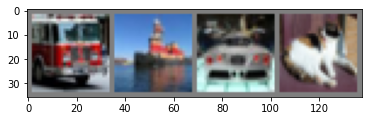

truck ship  car   cat  


In [65]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
    
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [57]:
images.shape

torch.Size([4, 3, 32, 32])

In [66]:
## 2. Define CNN
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self) :
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [67]:
## 3. Define Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [68]:
## 4. Train the network

for epoch in range(2):
    
    running_loss = 0.0
    for i ,data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000 == 1999:
            print(f'[{epoch+1}, {i + 1 : 5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.227
[1,  4000] loss: 1.883
[1,  6000] loss: 1.671
[1,  8000] loss: 1.576
[1,  10000] loss: 1.516
[1,  12000] loss: 1.449
[2,  2000] loss: 1.380
[2,  4000] loss: 1.347
[2,  6000] loss: 1.345
[2,  8000] loss: 1.312
[2,  10000] loss: 1.300
[2,  12000] loss: 1.274
Finished Training


In [69]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

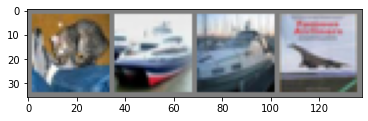

GroundTruth:  cat   ship  ship  plane


In [70]:
## 5. Test the network on the test data
dataiter = iter(testloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [71]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [72]:
outputs = net(images)

In [73]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   car   car   plane


In [74]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the grad for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


In [75]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            
            
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname :5s} is {accuracy :.1f} %')

Accuracy for class: plane is 61.3 %
Accuracy for class: car   is 72.6 %
Accuracy for class: bird  is 52.3 %
Accuracy for class: cat   is 31.6 %
Accuracy for class: deer  is 34.9 %
Accuracy for class: dog   is 62.7 %
Accuracy for class: frog  is 63.7 %
Accuracy for class: horse is 59.2 %
Accuracy for class: ship  is 63.7 %
Accuracy for class: truck is 69.9 %
